
## CUSTOMER CHURN ANALYSIS FOR A TELECOMMUNICATION COMPANY
### Saeid Rostami


The challenge is to design a model that will be able to predict whether a customer will stay or leave the company. 
- Exploring the Data (visualizing and data cleaning)
- Data preprocessing
- Evaluate Algorithms
- Model Tuning to Improve Result
- Upsampling
- Final model

### Data visualizing and data cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

### Summary of data

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

### Checking for NULL data

In [5]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Checking for duplicated data

In [6]:
data.duplicated().sum()

0

### Number of Churn

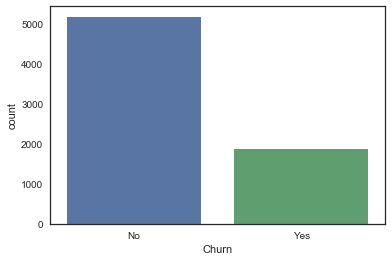

In [7]:
sns.set(style="white", palette="deep", color_codes=True)
sns.despine(left=True)
sns.countplot(data["Churn"]);

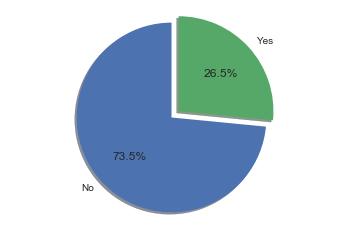

In [8]:
plt.pie(data["Churn"].value_counts(),explode=(0,0.1), autopct='%1.1f%%',
        shadow=True, startangle=90,labels=data["Churn"].unique())
plt.axis('equal') ;

### Data cleaning

In [9]:
data.query("TotalCharges == ' '").TotalCharges.count()

11

In [10]:
data["TotalCharges"] = data["TotalCharges"].replace(" ",np.nan)
data.dropna(inplace = True);

In [11]:
data["TotalCharges"] = data["TotalCharges"].astype("float")

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), ob

In [13]:
data[data["TotalCharges"]<0]["TotalCharges"].count()

0

In [14]:
temp_columns = [col for col in data.columns if col not in ("customerID","gender","MonthlyCharges","TotalCharges","Churn")]

In [15]:
temp_columns

['SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [16]:
for col in temp_columns:
    print("{} : {}".format(col,data[col].unique()))

SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [17]:
for col in temp_columns:
    if col in ("OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"):
        data[col] = data[col].replace({'No internet service':'No'})

In [18]:
temp_tenure = np.array(data["tenure"].tolist())
print("min: {}".format(temp_tenure.min()))
print("max: {}".format(temp_tenure.max()))

min: 1
max: 72


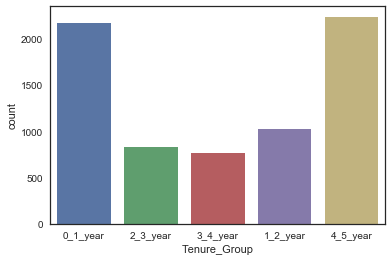

In [19]:
def tenure_to_group(data):
    if data["tenure"] <=12:
        return "0_1_year"
    elif (data["tenure"] > 12) & (data["tenure"] <= 24 ):
        return "1_2_year"
    elif (data["tenure"] > 24) & (data["tenure"] <= 36) :
        return "2_3_year"
    elif (data["tenure"] > 36) & (data["tenure"] <= 48) :
        return "3_4_year"
    elif data["tenure"] > 48 & (data["tenure"] <= 60):
        return "4_5_year"
    elif data["tenure"] > 60 & (data["tenure"] <= 72):
        return "5_6_year"
data["Tenure_Group"] = data.apply(lambda data:tenure_to_group(data),axis = 1)
sns.countplot(data["Tenure_Group"]);

### Visualization

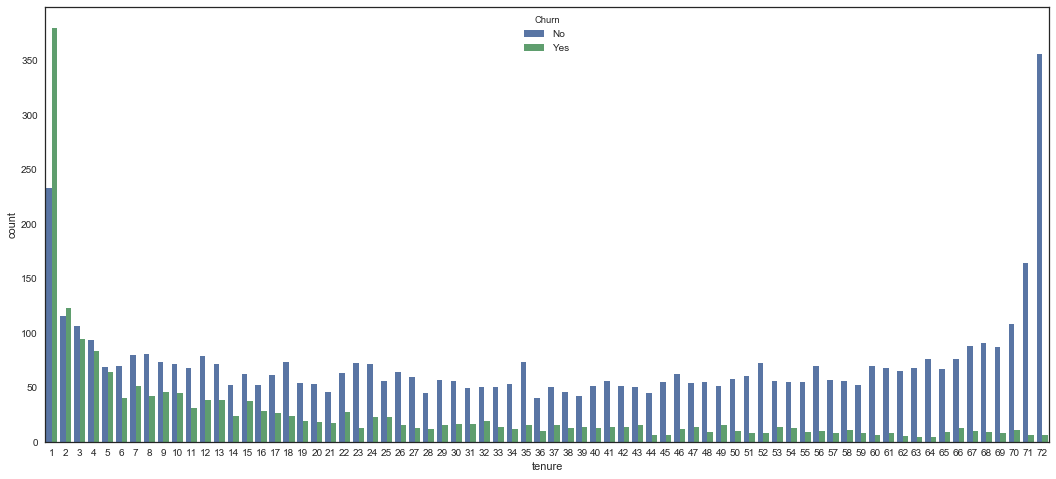

In [20]:
f, axes = plt.subplots(figsize=(18, 8))
sns.countplot(data["tenure"],hue = data["Churn"]);

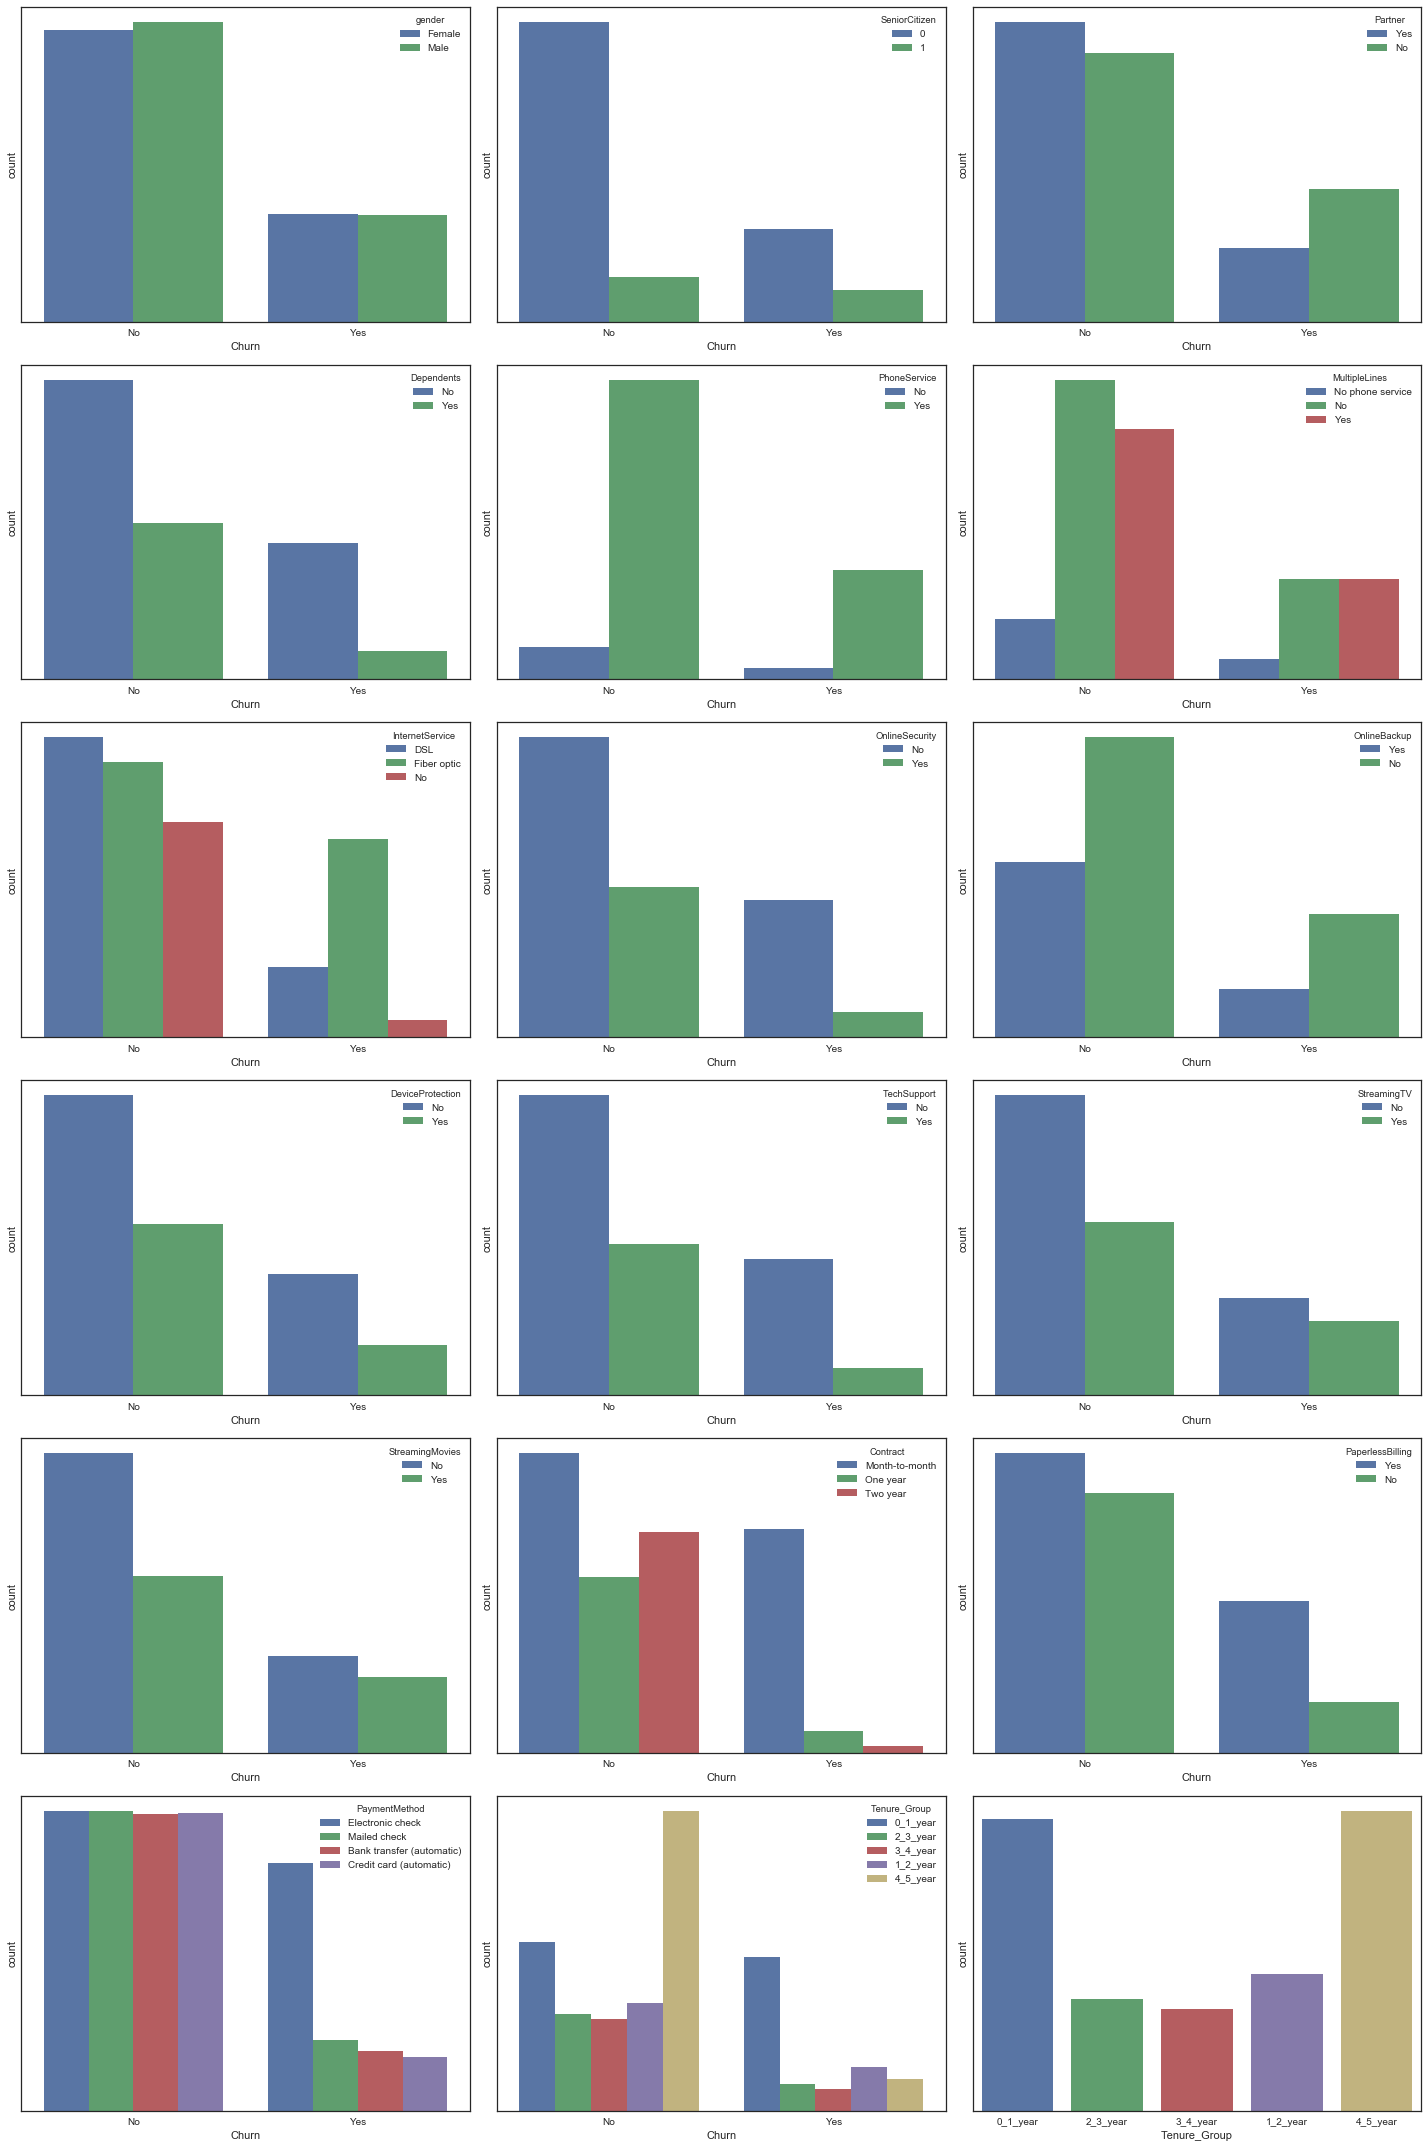

In [21]:
f, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 30))

sns.countplot(data["Churn"],hue = data["gender"],ax = axes[0,0])
sns.countplot(data["Churn"],hue = data["SeniorCitizen"],ax = axes[0,1])
sns.countplot(data["Churn"],hue = data["Partner"],ax = axes[0,2])
sns.countplot(data["Churn"],hue = data["Dependents"],ax = axes[1,0])
sns.countplot(data["Churn"],hue = data["PhoneService"],ax = axes[1,1])
sns.countplot(data["Churn"],hue = data["MultipleLines"],ax = axes[1,2])
sns.countplot(data["Churn"],hue = data["InternetService"],ax = axes[2,0])
sns.countplot(data["Churn"],hue = data["OnlineSecurity"],ax = axes[2,1])
sns.countplot(data["Churn"],hue = data["OnlineBackup"],ax = axes[2,2])
sns.countplot(data["Churn"],hue = data["DeviceProtection"],ax = axes[3,0])
sns.countplot(data["Churn"],hue = data["TechSupport"],ax = axes[3,1])
sns.countplot(data["Churn"],hue = data["StreamingTV"],ax = axes[3,2])
sns.countplot(data["Churn"],hue = data["StreamingMovies"],ax = axes[4,0])
sns.countplot(data["Churn"],hue = data["Contract"],ax = axes[4,1])
sns.countplot(data["Churn"],hue = data["PaperlessBilling"],ax = axes[4,2])
sns.countplot(data["Churn"],hue = data["PaymentMethod"],ax = axes[5,0])
sns.countplot(data["Churn"],hue = data["Tenure_Group"],ax = axes[5,1])
sns.countplot(data["Tenure_Group"],ax = axes[5,2]);

plt.setp(axes, yticks=[])
plt.tight_layout()

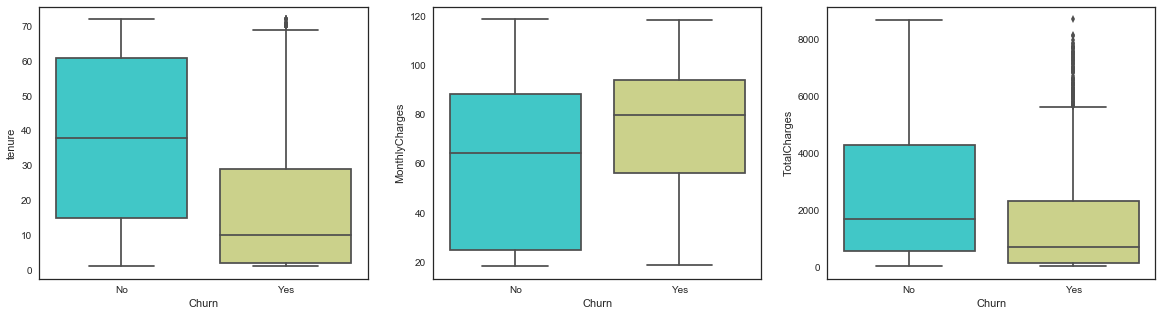

In [22]:
f, axes = plt.subplots( ncols=3, figsize=(20, 5))
sns.boxplot(x="Churn", y="tenure", data=data,palette='rainbow',ax = axes[0]);
sns.boxplot(x="Churn", y="MonthlyCharges", data=data,palette='rainbow',ax = axes[1])
sns.boxplot(x="Churn", y="TotalCharges", data=data,palette='rainbow',ax = axes[2])

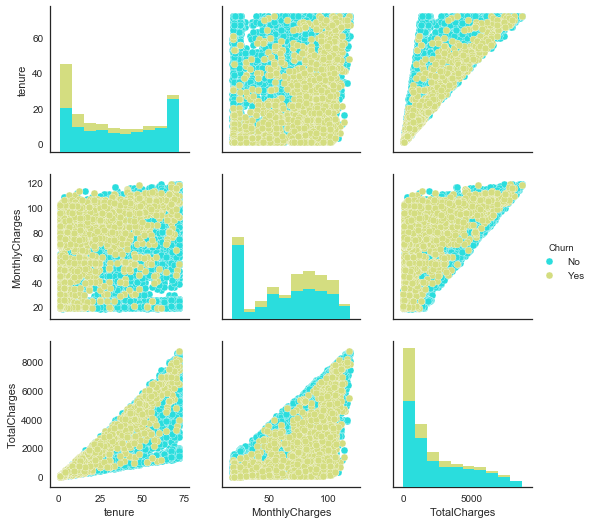

In [23]:
temp_cols = data.drop("SeniorCitizen",axis = 1)
sns.pairplot(temp_cols,hue='Churn',palette='rainbow')

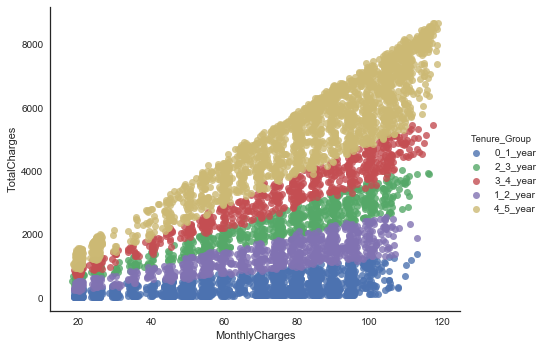

In [24]:
sns.lmplot(x = "MonthlyCharges", y= "TotalCharges", data=data,fit_reg = False,hue = "Tenure_Group",aspect=12/9);

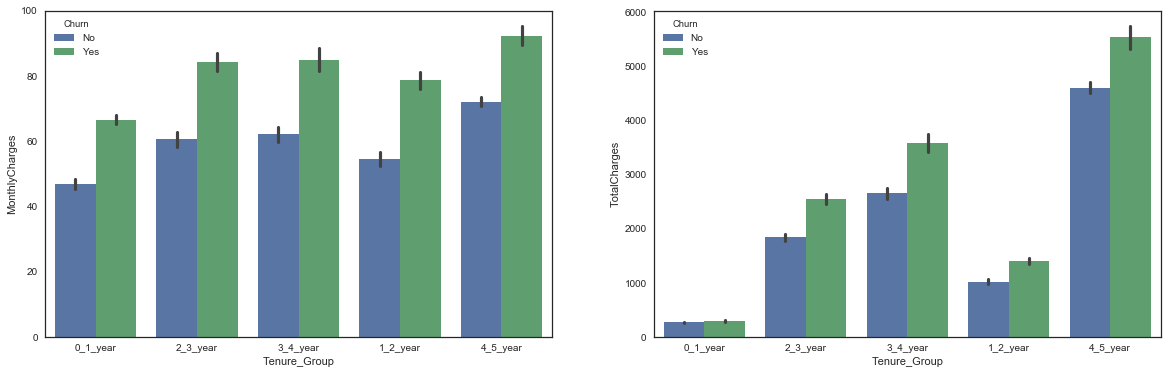

In [25]:
f, axes = plt.subplots( ncols=2, figsize=(20, 6))
sns.barplot(x='Tenure_Group',y='MonthlyCharges',data=data,hue = "Churn",ax = axes[0])
sns.barplot(x='Tenure_Group',y='TotalCharges',data=data,hue = "Churn",ax = axes[1])

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
Tenure_Group        7032 non-nul

### Data preprocessing

In [27]:
cat_cols = [x for x in data.columns if data[x].nunique()<6 and x!="Churn"]
num_cols = [x for x in data.columns if data[x].nunique()>6 and x!="customerID"]
id_customer = data["customerID"]
label = data["Churn"]
label = label.apply(lambda x: 1 if x == "Yes" else 0)

In [28]:
from sklearn.preprocessing import MinMaxScaler

features_log_transformed = pd.DataFrame(data = data[num_cols])
features_log_transformed[num_cols] = data[num_cols].apply(lambda x: np.log(x + 1))

scaler = MinMaxScaler()
features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[num_cols] = scaler.fit_transform(features_log_transformed[num_cols])

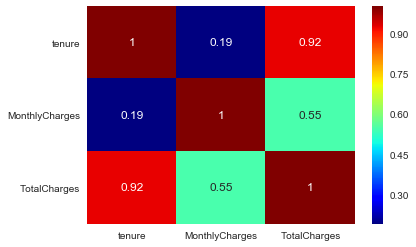

In [29]:
sns.heatmap(features_log_minmax_transform.corr(),annot=True,cmap='jet');

In [30]:
features_log_minmax_transform.drop("tenure",inplace = True, axis = 1)

In [31]:
data.drop(["MonthlyCharges","TotalCharges","tenure"],axis = 1, inplace = True)
data = pd.concat([data, features_log_minmax_transform], axis=1)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
Churn               7032 non-null object
Tenure_Group        7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
dtypes: float64(2), int64(1), o

In [33]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Churn               0
Tenure_Group        0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [34]:
data.duplicated().sum()

0

In [35]:
data.drop("Churn",inplace = True, axis = 1)
data.drop("customerID",inplace = True, axis = 1)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 19 columns):
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
Tenure_Group        7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
dtypes: float64(2), int64(1), object(16)
memory usage: 1.4+ MB


In [37]:
data = pd.get_dummies(data = data,columns = cat_cols)

In [38]:
data.head()

,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_Group_0_1_year,Tenure_Group_1_2_year,Tenure_Group_2_3_year,Tenure_Group_3_4_year,Tenure_Group_4_5_year
0,0.258016,0.072892,1,0,1,0,0,1,1,0,...,1,0,0,1,0,1,0,0,0,0
1,0.602917,0.749358,0,1,1,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
2,0.572840,0.280590,0,1,1,0,1,0,1,0,...,1,0,0,0,1,1,0,0,0,0
3,0.443484,0.745063,0,1,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0.719396,0.335724,1,0,1,0,1,0,1,0,...,1,0,0,1,0,1,0,0,0,0


In [39]:
data_original = pd.concat([data, label,id_customer], axis=1)

In [40]:
data_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 46 columns):
MonthlyCharges                             7032 non-null float64
TotalCharges                               7032 non-null float64
gender_Female                              7032 non-null uint8
gender_Male                                7032 non-null uint8
SeniorCitizen_0                            7032 non-null uint8
SeniorCitizen_1                            7032 non-null uint8
Partner_No                                 7032 non-null uint8
Partner_Yes                                7032 non-null uint8
Dependents_No                              7032 non-null uint8
Dependents_Yes                             7032 non-null uint8
PhoneService_No                            7032 non-null uint8
PhoneService_Yes                           7032 non-null uint8
MultipleLines_No                           7032 non-null uint8
MultipleLines_No phone service             7032 non-null uint8
Multipl

In [41]:
data_original.head()

,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_Group_0_1_year,Tenure_Group_1_2_year,Tenure_Group_2_3_year,Tenure_Group_3_4_year,Tenure_Group_4_5_year,Churn,customerID
0,0.258016,0.072892,1,0,1,0,0,1,1,0,...,0,1,0,1,0,0,0,0,0,7590-VHVEG
1,0.602917,0.749358,0,1,1,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,5575-GNVDE
2,0.572840,0.280590,0,1,1,0,1,0,1,0,...,0,0,1,1,0,0,0,0,1,3668-QPYBK
3,0.443484,0.745063,0,1,1,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,7795-CFOCW
4,0.719396,0.335724,1,0,1,0,1,0,1,0,...,0,1,0,1,0,0,0,0,1,9237-HQITU


### Evaluate Algorithms

In [851]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.3, random_state = 42)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 4922 samples.
Testing set has 2110 samples.


In [852]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve

def apply_classifier(clf,xTrain,xTest,yTrain,yTest):
    
    clf.fit(xTrain, yTrain)
    predictions = clf.predict(xTest)
    conf_mtx = confusion_matrix(yTest,predictions)
    f, axes = plt.subplots(ncols=2, figsize=(15, 5))
    sns.heatmap(conf_mtx,annot=True,cmap='tab20c',cbar = False,fmt = "g",ax = axes[0])
    axes[0].set_xlabel('Predicted labels')
    axes[0].set_ylabel('True labels')
    axes[0].set_title('Confusion Matrix'); 
    axes[0].xaxis.set_ticklabels(['Not Churn', 'Churn']);
    axes[0].yaxis.set_ticklabels(['Not Churn', 'Churn']);

    print("\n Classification report : \n {}".format(classification_report(yTest,predictions)))
    
    roc_auc = roc_auc_score(yTest,predictions) 
    print ("Area under ROC curve : ",roc_auc,"\n")

    fpr, tpr,_ = roc_curve(yTest, predictions)
    axes[1].plot(fpr,tpr,label= "auc="+str(roc_auc));
    axes[1].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")





 Classification report : 
              precision    recall  f1-score   support

          0       0.82      0.81      0.81      1549
          1       0.49      0.52      0.50       561

avg / total       0.73      0.73      0.73      2110

Area under ROC curve :  0.6621988310553988 



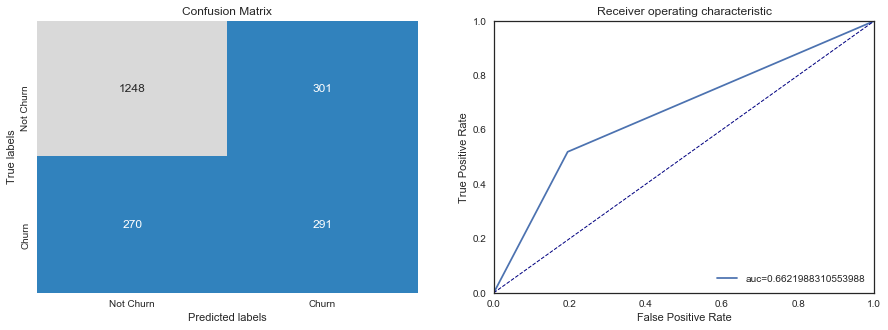

In [853]:
decision_tree = DecisionTreeClassifier(random_state = 42);
apply_classifier(decision_tree,X_train, X_test, y_train, y_test)


 Classification report : 
              precision    recall  f1-score   support

          0       0.84      0.90      0.87      1549
          1       0.65      0.52      0.58       561

avg / total       0.79      0.80      0.79      2110

Area under ROC curve :  0.7090032209843852 



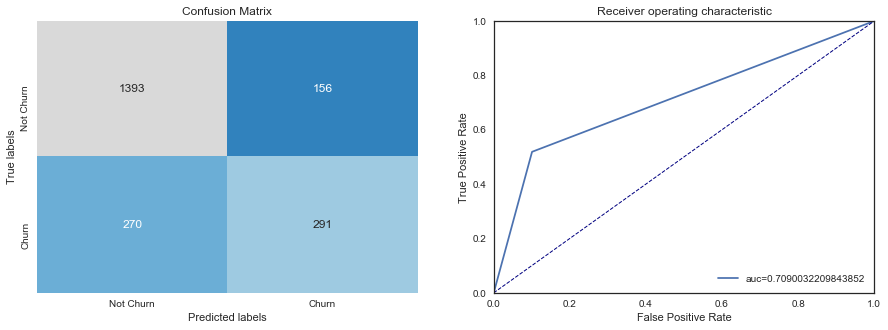

In [854]:
logistic_reg = LogisticRegression(random_state = 42)
apply_classifier(logistic_reg,X_train, X_test, y_train, y_test)


 Classification report : 
              precision    recall  f1-score   support

          0       0.81      0.93      0.87      1549
          1       0.67      0.41      0.51       561

avg / total       0.78      0.79      0.77      2110

Area under ROC curve :  0.6677017775829154 



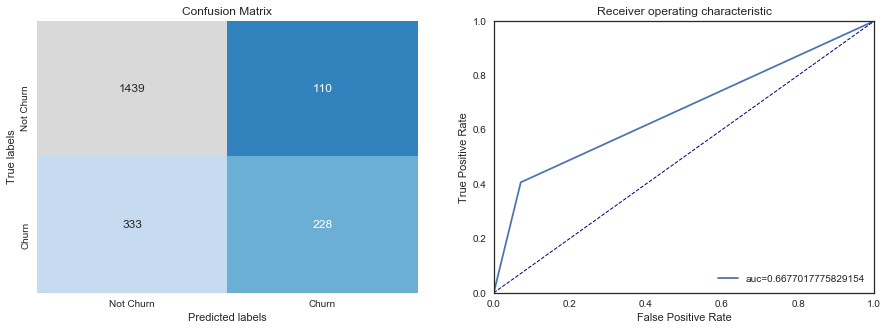

In [855]:
svm_model = SVC(random_state = 42)
apply_classifier(svm_model,X_train, X_test, y_train, y_test)


 Classification report : 
              precision    recall  f1-score   support

          0       0.81      0.91      0.86      1549
          1       0.62      0.42      0.50       561

avg / total       0.76      0.78      0.76      2110

Area under ROC curve :  0.6649940332961638 



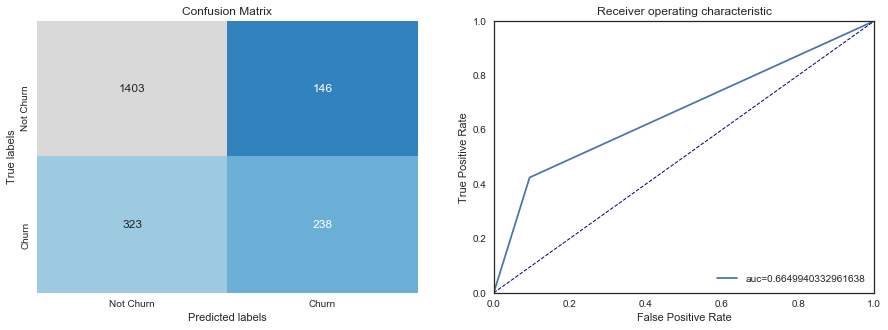

In [856]:
random_forest = RandomForestClassifier(random_state = 42)
apply_classifier(random_forest,X_train, X_test, y_train, y_test)


 Classification report : 
              precision    recall  f1-score   support

          0       0.83      0.90      0.87      1549
          1       0.65      0.50      0.57       561

avg / total       0.79      0.80      0.79      2110

Area under ROC curve :  0.7034870406875116 



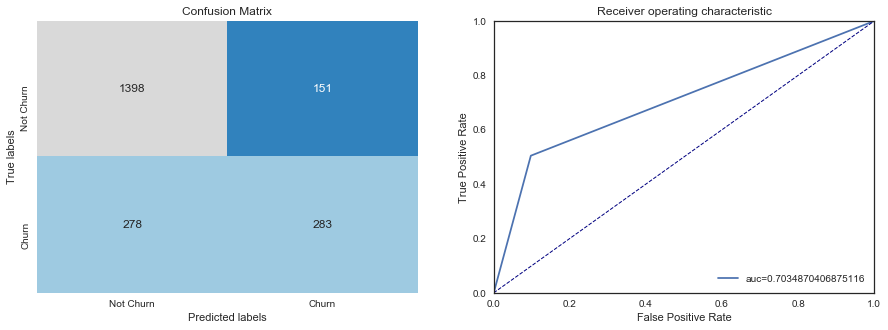

In [857]:
xg_boost = XGBClassifier(random_state = 42)
apply_classifier(xg_boost,X_train, X_test, y_train, y_test)

### Tuning Parameters

In [858]:
Tree_parameters = {"max_depth": [3,4,5,6],
                   "min_samples_leaf":[1,2,3,4]}

LogReg_parameters = {
    "C":[0.25,0.5,0.75,1.0,1.5,2.0,2.5,3.0,4.0,10.0],
    "solver":["newton-cg", "lbfgs", "sag", "saga"],
    "tol":[0.01,0.001,0.0001,0.00001],
    "warm_start":["True","False"]}

SVM_parameters = {
    "C":[1.0,2.0,3.0],
    "cache_size":[100,200],
    "decision_function_shape":['ovo','ovr'],
    "kernel":['sigmoid',"linear"],
    "tol":[0.001,0.0001]}

RandomForest_parameters = {
    "n_estimators" :[10,15,20,25,30], 
    "criterion": ["entropy","gini"],
    "max_depth" : [5,10,15],
    "min_samples_split":[2,4,8,16],
    "max_features":["sqrt","auto","log2"],
    "class_weight" : ["balanced_subsample","balanced"]}

Xgboost_parameters = {"max_depth" : [3,4,5,6],
    "learning_rate" : [0.001,0.0001],
    "booster" : ["gbtree","gblinear","dart"],
    "min_child_weight" : [1,2,3,4]
                     
                     }


In [736]:
from sklearn.grid_search import GridSearchCV

def grid_search(clf,parameters,xTrain,Ytrain):
    
    
    grid_obj = GridSearchCV(clf,parameters,scoring = 'roc_auc',cv = 5)
    grid_fit = grid_obj.fit(xTrain,Ytrain)
    best_clf = grid_fit.best_estimator_

    return best_clf




 Classification report : 
              precision    recall  f1-score   support

          0       0.86      0.82      0.84      1549
          1       0.56      0.64      0.60       561

avg / total       0.78      0.77      0.78      2110

Area under ROC curve :  0.7296605595697989 



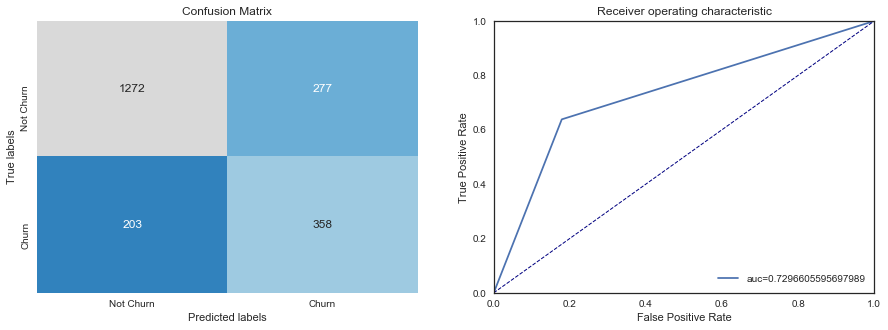

In [737]:
tree_grid = grid_search(decision_tree,Tree_parameters,X_train,y_train);
apply_classifier(tree_grid,X_train, X_test, y_train, y_test)


 Classification report : 
              precision    recall  f1-score   support

          0       0.83      0.90      0.87      1549
          1       0.65      0.50      0.57       561

avg / total       0.78      0.80      0.79      2110

Area under ROC curve :  0.7014588216881916 



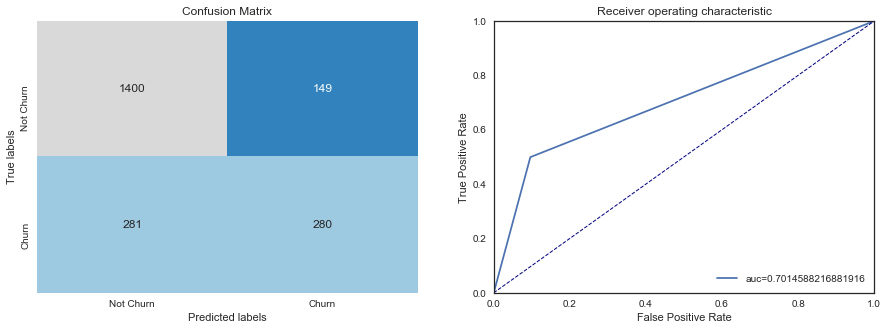

In [738]:
logReg_grid = grid_search(logistic_reg,LogReg_parameters,X_train,y_train);
apply_classifier(logReg_grid,X_train, X_test, y_train, y_test)


 Classification report : 
              precision    recall  f1-score   support

          0       0.83      0.92      0.87      1549
          1       0.67      0.47      0.55       561

avg / total       0.78      0.80      0.78      2110

Area under ROC curve :  0.6903349754714962 



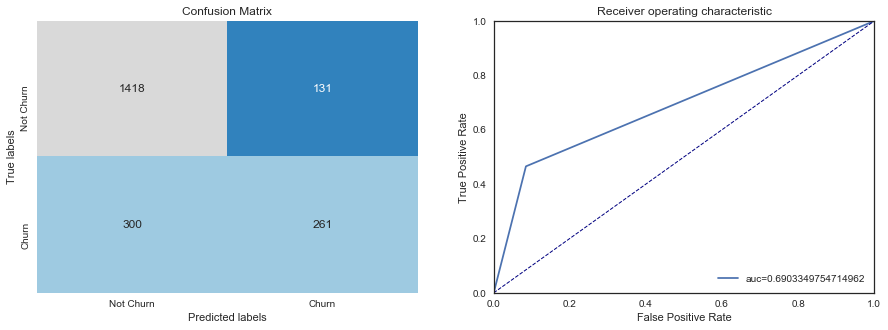

In [739]:
svm_grid = grid_search(svm_model,SVM_parameters,X_train,y_train);
apply_classifier(svm_grid,X_train, X_test, y_train, y_test)


 Classification report : 
              precision    recall  f1-score   support

          0       0.90      0.72      0.80      1549
          1       0.50      0.79      0.61       561

avg / total       0.80      0.74      0.75      2110

Area under ROC curve :  0.7525578574642485 



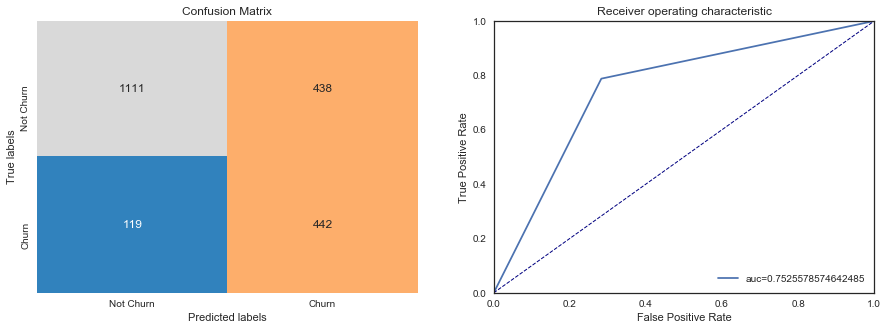

In [740]:
randomForest_grid = grid_search(random_forest,RandomForest_parameters,X_train,y_train);
apply_classifier(randomForest_grid,X_train, X_test, y_train, y_test)


 Classification report : 
              precision    recall  f1-score   support

          0       0.84      0.88      0.86      1549
          1       0.61      0.53      0.56       561

avg / total       0.78      0.78      0.78      2110

Area under ROC curve :  0.70159346090687 



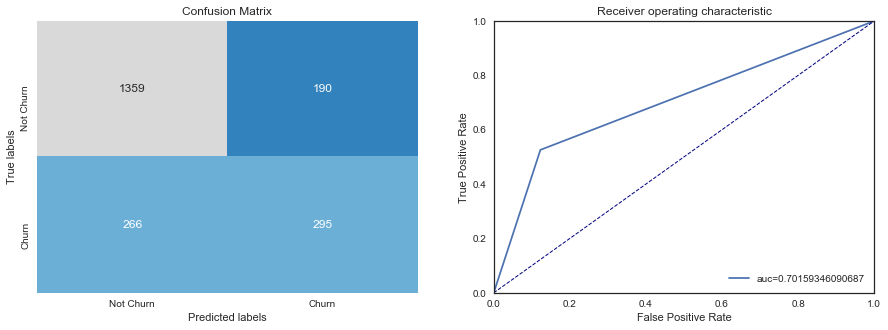

In [741]:
xgBoost_grid = grid_search(xg_boost,Xgboost_parameters,X_train,y_train);
apply_classifier(xgBoost_grid,X_train, X_test, y_train, y_test)


 Classification report : 
              precision    recall  f1-score   support

          0       0.91      0.71      0.80      1549
          1       0.51      0.81      0.62       561

avg / total       0.80      0.74      0.75      2110

Area under ROC curve :  0.7607478345525663 



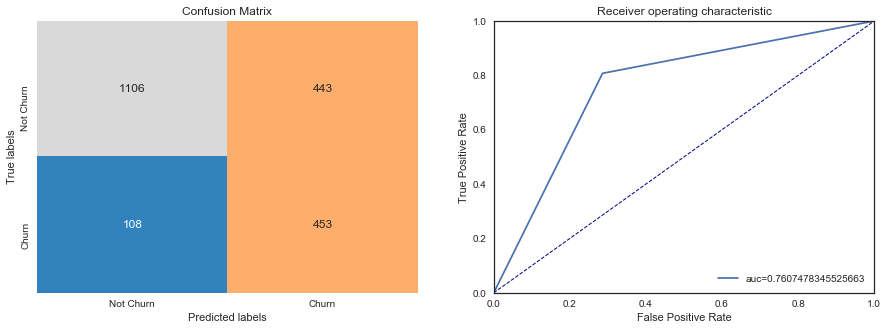

In [760]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(base_estimator = randomForest_grid, n_estimators = 4)
apply_classifier(model,X_train, X_test, y_train, y_test)

### Upsampling

In [742]:
from sklearn.utils import resample

upsample_data = data_original

majority = upsample_data[upsample_data["Churn"]==0]
minority = upsample_data[upsample_data["Churn"]==1]

minority_upsampled = resample(minority, replace=True, n_samples=5163,random_state=42) 
del(upsample_data)
upsample_data = pd.concat([majority,minority_upsampled])

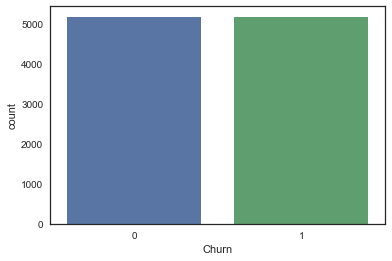

In [743]:
sns.countplot(upsample_data["Churn"]);

In [744]:
id_customer_upsample = upsample_data["customerID"]
label_upsample = upsample_data["Churn"]
upsample_data.drop("Churn",inplace = True, axis = 1)
upsample_data.drop("customerID",inplace = True, axis = 1)

In [745]:
from sklearn.cross_validation import train_test_split

X_train_upS, X_test_upS, y_train_upS, y_test_upS = train_test_split(upsample_data, label_upsample, test_size = 0.3, random_state = 42)

print("Training set has {} samples.".format(X_train_upS.shape[0]))
print("Testing set has {} samples.".format(X_test_upS.shape[0]))

Training set has 7228 samples.
Testing set has 3098 samples.



 Classification report : 
              precision    recall  f1-score   support

          0       0.92      0.80      0.86      1571
          1       0.82      0.93      0.87      1527

avg / total       0.87      0.87      0.86      3098

Area under ROC curve :  0.8663465638869541 



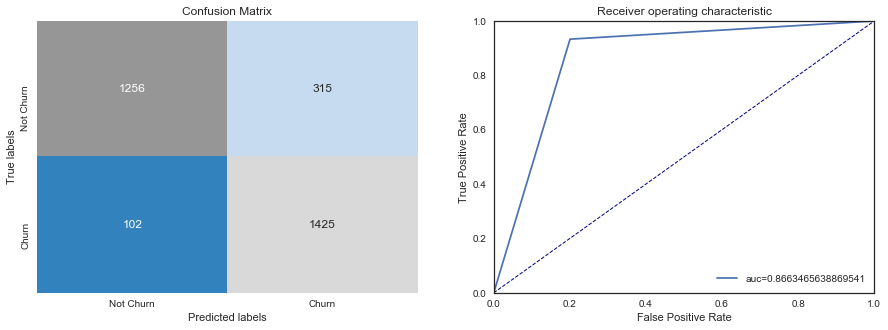

In [746]:
decision_tree = DecisionTreeClassifier(random_state = 42);
apply_classifier(decision_tree,X_train_upS, X_test_upS, y_train_upS, y_test_upS)


 Classification report : 
              precision    recall  f1-score   support

          0       0.80      0.73      0.76      1571
          1       0.74      0.81      0.78      1527

avg / total       0.77      0.77      0.77      3098

Area under ROC curve :  0.7694876479678122 



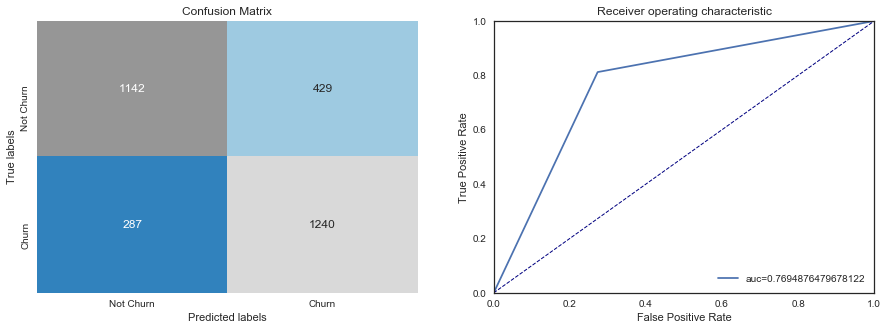

In [747]:
logistic_reg = LogisticRegression(random_state = 42)
apply_classifier(logistic_reg,X_train_upS, X_test_upS, y_train_upS, y_test_upS)


 Classification report : 
              precision    recall  f1-score   support

          0       0.80      0.71      0.75      1571
          1       0.73      0.82      0.77      1527

avg / total       0.77      0.76      0.76      3098

Area under ROC curve :  0.7635322522621666 



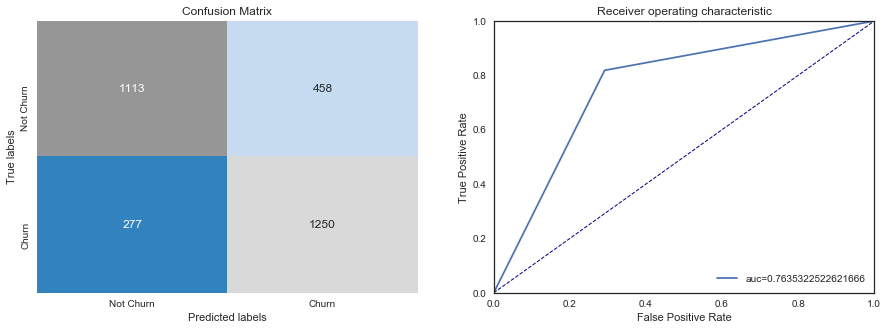

In [748]:
svm_model = SVC(random_state = 42)
apply_classifier(svm_model,X_train_upS, X_test_upS, y_train_upS, y_test_upS)


 Classification report : 
              precision    recall  f1-score   support

          0       0.94      0.84      0.88      1571
          1       0.85      0.94      0.89      1527

avg / total       0.89      0.89      0.89      3098

Area under ROC curve :  0.8896902227129991 



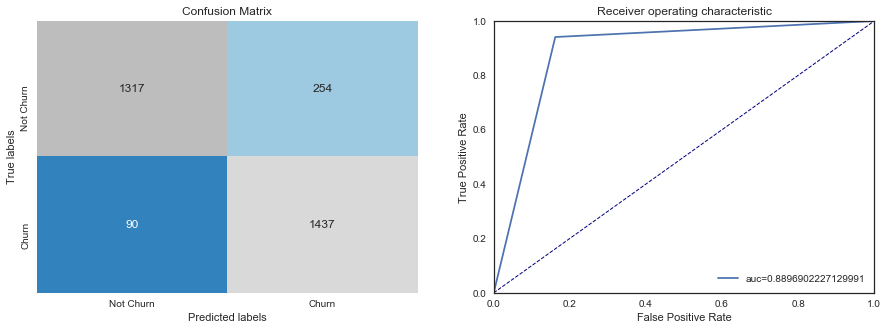

In [749]:
random_forest = RandomForestClassifier(random_state = 42)
apply_classifier(random_forest,X_train_upS, X_test_upS, y_train_upS, y_test_upS)


 Classification report : 
              precision    recall  f1-score   support

          0       0.81      0.74      0.77      1571
          1       0.76      0.82      0.79      1527

avg / total       0.78      0.78      0.78      3098

Area under ROC curve :  0.7820560277825368 



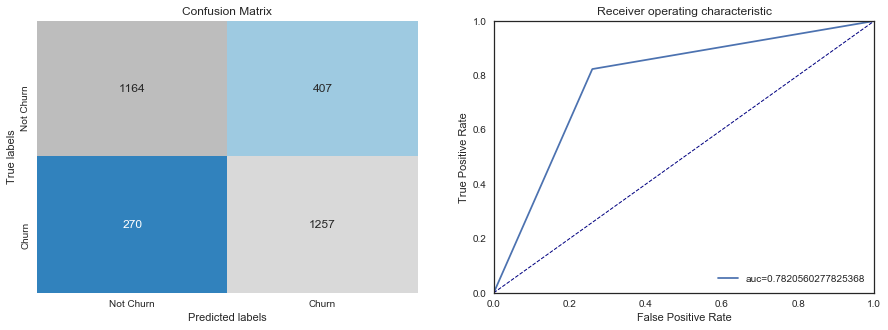

In [750]:
xg_boost = XGBClassifier(random_state = 42)
apply_classifier(xg_boost,X_train_upS, X_test_upS, y_train_upS, y_test_upS)

### Final Model


 Classification report : 
              precision    recall  f1-score   support

          0       0.95      0.85      0.90      1571
          1       0.86      0.95      0.90      1527

avg / total       0.91      0.90      0.90      3098

Area under ROC curve :  0.9022310901127468 



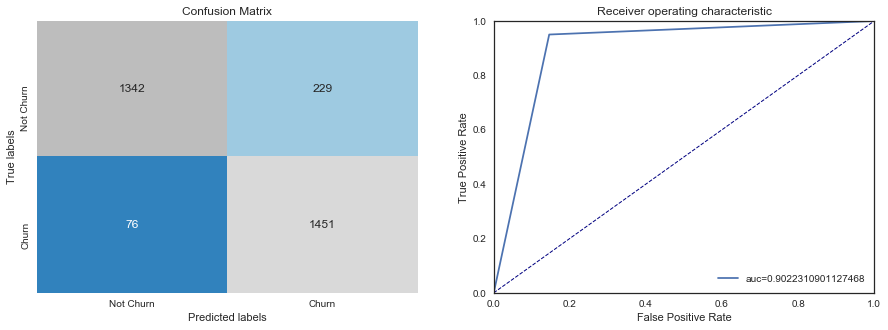

In [761]:
model = AdaBoostClassifier(base_estimator = random_forest, n_estimators = 4)
apply_classifier(model,X_train_upS, X_test_upS, y_train_upS, y_test_upS)

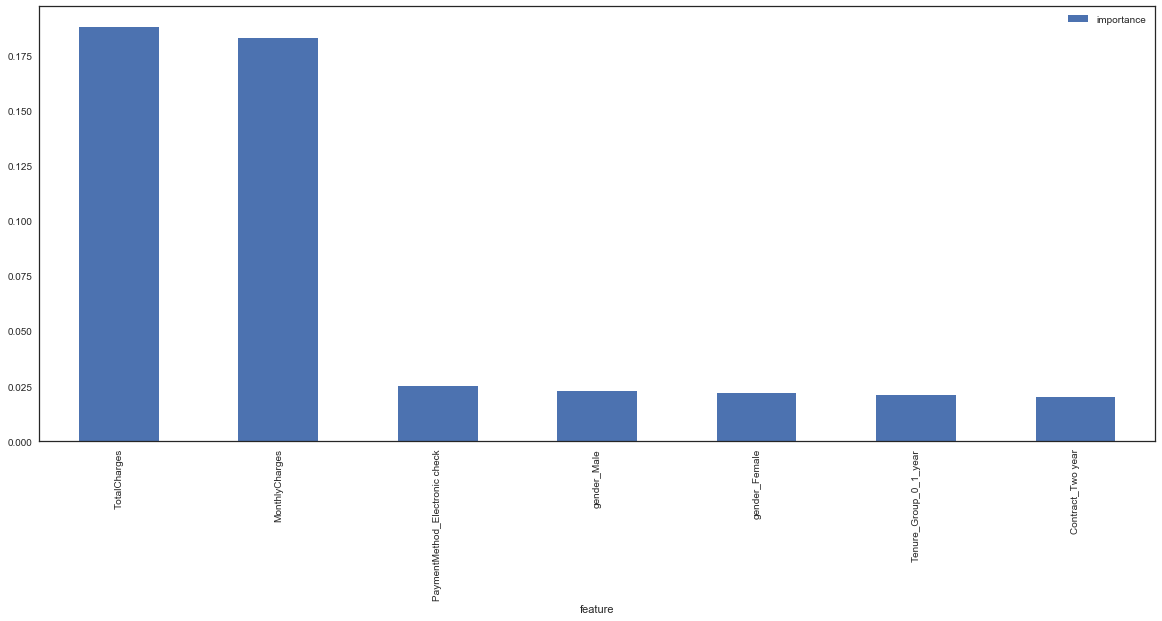

In [804]:
importances = pd.DataFrame({'feature':data.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances[0:7].plot.bar(figsize=(20, 8))